In [1]:
import os
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path
#sys.path.insert(0, '../Code/')
#from Perceptron import Perceptron   


['/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/media/psoligo/DB11/git/3670-UNLaM-CD/.venv/lib/python3.10/site-packages']

In [2]:
skdf = datasets.load_iris(as_frame=False)
df = pd.DataFrame(skdf["data"], columns=skdf['feature_names']) 
target = pd.Series(skdf["target"], name="target")
df = df.join(target)

In [3]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [4]:
df[["sepal length (cm)", 'petal length (cm)', 'target']].head() 

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [5]:
#['setosa', 'versicolor', 'virginica']
y = df.iloc[0:100]['target'].values 

In [6]:
y = np.where(y == 0, -1, 1)

In [7]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [8]:
# extract sepal length and petal length
X = df.iloc[0:100][["sepal length (cm)", 'petal length (cm)']].values

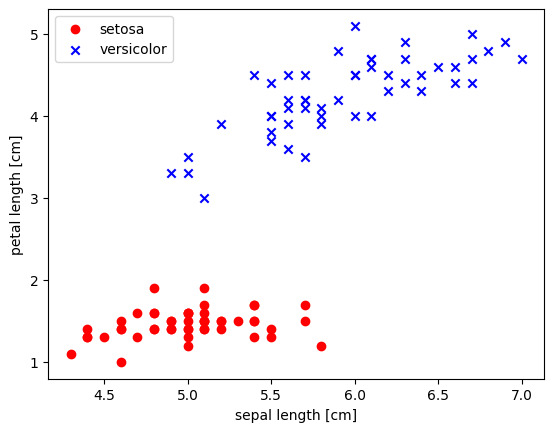

In [9]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float Learning rate (between 0.0 and 1.0)
    n_iter : int Passes over the training dataset.
    random_state : int  Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta            = eta
        self.n_iter         = n_iter
        self.random_state   = random_state

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples is the number of
        examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
        Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_         = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_    = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] = self.w_[0] + update
                self.w_[1:] = self.w_[1:] + update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        X_ext = np.insert(X, 0, 1) 
        val = np.matmul(X_ext, self.w_)
        return val
        #return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        matprod = self.net_input(X)
        return np.where(matprod>=0.0, 1, -1)

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()